In [1]:
cd ../analysis/

/srv/data/home/jlee782/segmentation/analysis


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
# from paper_visualizations import * 
from PixelEM import * 
# from test_sample import test_sample_obj
from withClustAnalysis import *

Populating the interactive namespace from numpy and matplotlib


/home/jlee782/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
# compile all algo and MV PRJs into one big table
df = compile_all_algo_PRJs()

In [6]:
# df.groupby(["objid","sample_num","num_workers"])

In [12]:
selected_df = df[(df["num_workers"]==25)&(df["sample_num"]==0)&(df["objid"]==1)&(df["clust"]==0)]

In [49]:
sample = "25workers_rand0"
objid=1
#thresh_lst=[-4,-2,0,2,4,8,10]
thresh_lst=np.arange(-15,70,1)
cluster_id=0
all_prjs = deriveGTinGroundTruthExperiments(sample, objid, "GT",thresh_lst,cluster_id = cluster_id, exclude_isovote=False,rerun_existing=True)
df = pd.DataFrame(all_prjs,columns=["thresh","p","r","j"])

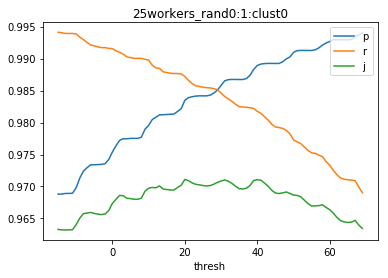

In [53]:
plt.title("{}:{}:clust{}".format(sample,objid,cluster_id))
plt.plot(df["thresh"],df["p"],label="p")
plt.plot(df["thresh"],df["r"],label="r")
plt.plot(df["thresh"],df["j"],label="j")
plt.xlabel("thresh")
plt.legend(loc="upper right")

In [54]:
sample = "25workers_rand0"
objid=1
#thresh_lst=[-4,-2,0,2,4,8,10]
thresh_lst=np.arange(-15,70,1)
cluster_id=0
def run_threshold_experiment(sample,objid,thresh_lst,cluster_id):
    all_prjs = deriveGTinGroundTruthExperiments(sample, objid, "GT",thresh_lst,cluster_id = cluster_id, exclude_isovote=False,rerun_existing=True)
    df = pd.DataFrame(all_prjs,columns=["thresh","p","r","j"])
    
    plt.figure()
    plt.title("{}:{}:clust{}".format(sample,objid,cluster_id))
    plt.plot(df["thresh"],df["p"],label="p")
    plt.plot(df["thresh"],df["r"],label="r")
    plt.plot(df["thresh"],df["j"],label="j")
    plt.xlabel("thresh")
    plt.legend(loc="upper right")

In [ ]:
for objid in object_lst:
    run_threshold_experiment(sample,objid,thresh_lst,"")